In [622]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [623]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

In [624]:
# 훈련 및 테스트 데이터 세트 결합
train_test_data = [train, test]

In [625]:
# Name값에서 성별 정보 추출
# 정규표현식으로 [문자]. 으로 끝나는 문자열 추출
for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract('([A-za-z]+)\.', expand=False)

In [626]:

# Name값에서 추출한 성별정보의 갯수 확인
# train data set
test['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

In [627]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

In [628]:
title_mapping = {
      'Mr' : 0
    , 'Miss' : 1
    , 'Mrs' : 2
    , 'Master' : 4
    , 'Dr' : 3
    , 'Rev' : 3
    , 'Mlle' : 3
    , 'Major' : 3
    , 'Col' : 3
    , 'Countess' : 3
    , 'Capt' : 3
    , 'Ms' : 3
    , 'Sir' : 3
    , 'Lady' : 3
    , 'Mme' : 3
    , 'Don' : 3
    , 'Jonkheer' : 3
}
train['Title'] = train['Title'].map(title_mapping)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [629]:
title_mapping = {
    'Mr' : 0 , 'Mrs' : 1, 'Miss' : 2, 'Master' : 4, 'Ms' : 3, 'Col' : 3, 'Rev' : 3, 'Dr' : 3, 'Dona' : 3
}
test['Title']= test['Title'].map(title_mapping)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [630]:
# 데이터 셋에서 불필요한 feature 삭제
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

---
### 성별
---

In [631]:
# 성별에 숫자 매핑
sex_mapping = {'male': 0, 'female':1}

In [632]:
# 반복문으로 매핑결과 데이터에 적용
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

In [633]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0


In [634]:
train.sort_values(by='Ticket')

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
504,505,1,1,1,16.0,0,0,110152,86.500,B79,S,1
257,258,1,1,1,30.0,0,0,110152,86.500,B77,S,1
759,760,1,1,1,33.0,0,0,110152,86.500,B77,S,3
262,263,0,1,0,52.0,1,1,110413,79.650,E67,S,0
558,559,1,1,1,39.0,1,1,110413,79.650,E67,S,2
...,...,...,...,...,...,...,...,...,...,...,...,...
235,236,0,3,1,NaN,0,0,W./C. 6609,7.550,NaN,S,1
92,93,0,1,0,46.0,1,0,W.E.P. 5734,61.175,E31,S,0
219,220,0,2,0,30.0,0,0,W/C 14208,10.500,NaN,S,0
540,541,1,1,1,36.0,0,2,WE/P 5735,71.000,B22,S,1


In [635]:
ticket_unique = train['Ticket'].unique()

In [636]:
# for ticket in train['Ticket'].unique():
#     train.loc[train['Ticket']==ticket,'group_size'] = len(train[train['Ticket']==ticket])

# for ticket in test['Ticket'].unique():
#     test.loc[test['Ticket']==ticket,'group_size'] = len(test[test['Ticket']==ticket])

In [637]:
# train['Fare'] = train['Fare'] / train['group_size']
# test['Fare'] = test['Fare'] / test['group_size']

In [638]:
# train data set
train['Age'].fillna(train.groupby('Title')['Age'].transform('median'), inplace=True)

# test data set
test['Age'].fillna(test.groupby('Title')['Age'].transform('median'), inplace=True)

In [639]:
train_test_data = [train,test]
for train_cp in train_test_data:
    train_cp.loc[train_cp['Age'] <= 16,'Age'] = 0
    train_cp.loc[(train_cp['Age'] > 16) & (train_cp['Age'] <= 26 ),'Age'] = 1
    train_cp.loc[(train_cp['Age'] > 26) & (train_cp['Age'] <= 36 ),'Age'] = 2
    train_cp.loc[(train_cp['Age'] > 36) & (train_cp['Age'] <= 62 ),'Age'] = 3
    train_cp.loc[train_cp['Age'] > 62,'Age'] = 4

train['Age'].value_counts(), test['Age'].value_counts()

(2.0    336
 1.0    255
 3.0    181
 0.0    104
 4.0     15
 Name: Age, dtype: int64,
 2.0    139
 1.0    134
 3.0    100
 0.0     38
 4.0      7
 Name: Age, dtype: int64)

In [640]:
# 나이대별 생사여부 확인
survived = train[train['Survived']==1]['Age'].value_counts()
dead = train[train['Survived']==0]['Age'].value_counts()

In [641]:
# 좌석별 승선 항구 확인하기
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()

In [642]:
# DataFrame으로 만들어 인덱스 주기 
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class', '2nd class', '3rd class']

In [643]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [644]:
# 머신러닝 Classifier를 위해 텍스트 숫자 변경(매핑)
embarked_mapping = {'S':0, 'C':1, 'Q':2}

# map 함수 사용해서 처리
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

In [645]:
# 탑승권 가격이 결측값일 경우, 좌석 등급별 중간값으로 대치
# train data set
train["Fare"].fillna(train.groupby('Pclass')['Fare'].transform('median'), inplace=True)

# test data set
test["Fare"].fillna(test.groupby('Pclass')['Fare'].transform('median'), inplace=True)

/Users/jeonchan/miniforge3/envs/ml_dev/lib/python3.10/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/Users/jeonchan/miniforge3/envs/ml_dev/lib/python3.10/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


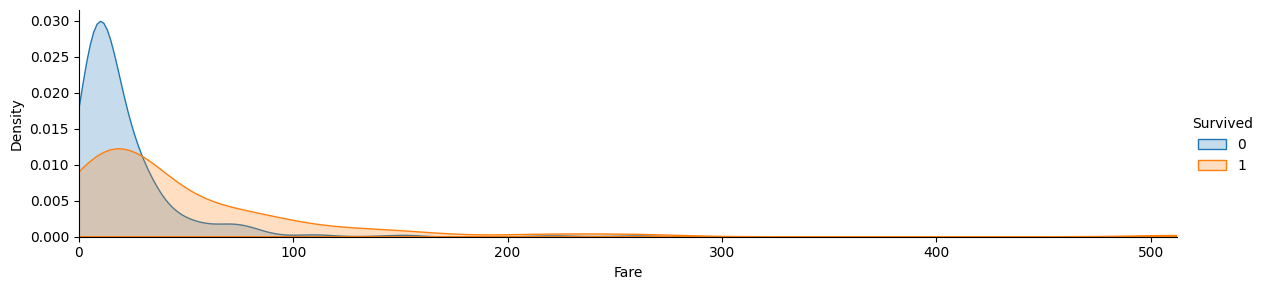

In [646]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)  # 데이터를 survived로 나누겠다
facet.map(sns.kdeplot, 'Fare', shade=True) # FacetGrid의 객체 facet에 'map'함수를 이용해 어떤 그래프를 그릴 것인지 명시 & 변수명 명시 
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()

In [647]:
train.loc[train['Fare'] <=17 ,'Fare'] = 0
train.loc[(train['Fare'] > 17) & (train['Fare']<= 30 ),'Fare'] = 1
train.loc[(train['Fare'] > 30) & (train['Fare']<= 100 ),'Fare'] = 2
train.loc[train['Fare'] > 100 , 'Fare'] = 3

test.loc[test['Fare'] <=17 ,'Fare'] = 0
test.loc[(test['Fare'] > 17) & (test['Fare']<= 30 ),'Fare'] = 1
test.loc[(test['Fare'] > 30) & (test['Fare']<= 100 ),'Fare'] = 2
test.loc[test['Fare'] > 100 , 'Fare'] = 3

In [648]:
# 반복문을 통해 객실번호의 알파벳과 숫자 분리 후, 알파벳만 뽑아오기
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

<AxesSubplot: >

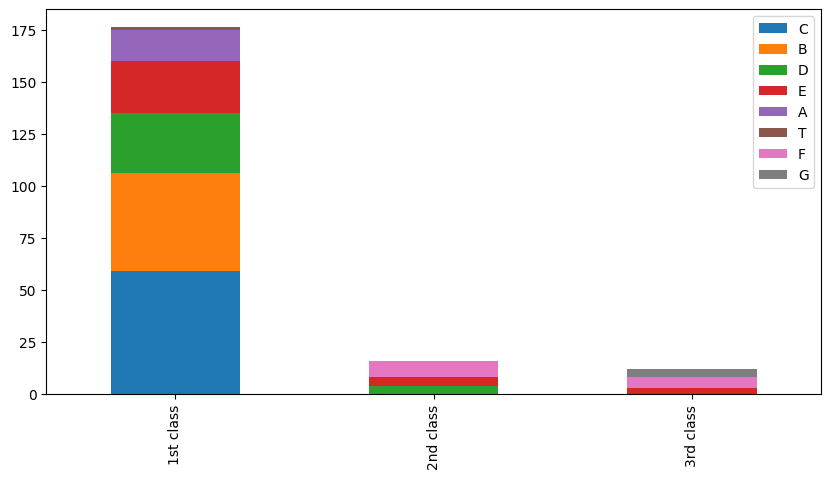

In [649]:
# 클래스별로 객실 종류 count
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()

df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class', '2nd class', '3rd class']

df.plot(kind='bar', stacked=True, figsize=(10,5))

In [650]:
# classifier를 위해 매핑
# feature scaling : raw data 전처리하는 과정 (feature들의 크기, 범위 정규화)/ 소수점 사용
# 숫자의 범위가 비슷하지 않으면 먼 거리에 있는 데이터를 조금 더 중요하게 생각할 수 있음 주의

cabin_mapping = {'A':0, 'B':0.4, 'C':0.8, 'D':1.2, 'E':1.6, 'F':2, 'G':2.4, 'T': 2.8}

for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [651]:
# Cabin의 missing field는 1등급 2등급 3등급 클래스와 밀접한 관계
# 각 클래스별 cabin의 중간값을 missing value 처리

train['Cabin'].fillna(train.groupby('Pclass')['Cabin'].transform('median'), inplace=True)

test['Cabin'].fillna(test.groupby('Pclass')['Cabin'].transform('median'), inplace=True)

train.tail(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
881,882,0,3,0,2.0,0,0,349257,0.0,2.0,0,0
882,883,0,3,1,1.0,0,0,7552,0.0,2.0,0,1
883,884,0,2,0,2.0,0,0,C.A./SOTON 34068,0.0,1.8,0,0
884,885,0,3,0,1.0,0,0,SOTON/OQ 392076,0.0,2.0,0,0
885,886,0,3,1,3.0,0,5,382652,1.0,2.0,2,2
886,887,0,2,0,2.0,0,0,211536,0.0,1.8,0,3
887,888,1,1,1,1.0,0,0,112053,1.0,0.4,0,1
888,889,0,3,1,1.0,1,2,W./C. 6607,1.0,2.0,0,1
889,890,1,1,0,1.0,0,0,111369,1.0,0.8,1,0
890,891,0,3,0,2.0,0,0,370376,0.0,2.0,2,0


In [652]:
# 혼자타면 SibSp, Parch 모두 0으로 표시되므로 +1 해주기
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

In [653]:
# mapping
# feature scaling 
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [654]:
# 불필요한 데이터 삭제 : drop
# Ticket, SibSp, Parch, PassengerId 정보 제거

features_drop = ['Ticket', 'SibSp', 'Parch']

train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)

In [655]:
train.shape

(891, 10)

In [656]:
train_data = train.drop('Survived',axis=1)
target = train['Survived']

train_data.shape, target.shape

((891, 9), (891,))

In [657]:
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
Fare           0
Cabin          0
Embarked       0
Title          0
FamilySize     0
dtype: int64

In [658]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import numpy as np
import xgboost as xgb 
from xgboost import XGBClassifier

In [659]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=42)
clf = KNeighborsClassifier(n_neighbors=13) # Knn Model object
scoring = 'accuracy' #평가지표 : 정확도
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=-1, scoring=scoring)
print(score.mean())

0.5442571785268414


In [660]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=42)
clf = DecisionTreeClassifier() # Knn Model object
scoring = 'accuracy' #평가지표 : 정확도
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=-1, scoring=scoring)
print(score.mean())

0.7564044943820225


In [661]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=42)
clf = RandomForestClassifier() # Knn Model object
scoring = 'accuracy' #평가지표 : 정확도
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=-1, scoring=scoring)
print(score.mean())

0.802434456928839


In [662]:
# clf = RandomForestClassifier(n_estimators=900, max_depth=5)
# clf.fit(train_data, target) # 학습

# prediction = clf.predict(test) # 테스트 데이터로 예측값 추출

In [663]:
# submission = pd.DataFrame(
#     {
#         "PassengerId":test["PassengerId"], # 앞에서 PassendgerId 삭제했으므로 다시 불러 옴
#         "Survived":prediction
#     }
# )
# submission.to_csv('titanic89.csv', index=False)

In [664]:
# from sklearn.model_selection import GridSearchCV
# parameters = {'n_estimators':[900,1000,1500]
#             #   ,'min_samples_split' : [3.5,7]
#             #   ,'min_samples_leaf' : [3,5,8]}
# }
# grid_rfclf = GridSearchCV(xgb, param_grid=parameters, scoring='accuracy', cv=5)
# grid_rfclf.fit(train_data, target)
# print(grid_rfclf.best_params_)
# print(grid_rfclf.best_score_)

In [665]:
# xgb  = XGBClassifier()
# xgb.fit(train_data, target)

# Y_pred = xgb.predict(test)

# xgb.score(train_data, target)

In [666]:
# clf = RandomForestClassifier(n_estimators=900, max_depth=5)
# clf.fit(train_data, target) # 학습

# prediction = clf.predict(test) # 테스트 데이터로 예측값 추출



In [667]:
# submission = pd.DataFrame(
#     {
#         "PassengerId":test["PassengerId"], # 앞에서 PassendgerId 삭제했으므로 다시 불러 옴
#         "Survived":prediction
#     }
# )
# submission.to_csv('titanic72.csv', index=False)

In [668]:
xgboost  = XGBClassifier()
xgboost.fit(train_data, target)
Y_pred = xgboost.predict(test)
print(xgboost.score(train_data, target))

submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('titanic96.csv', index=False)

0.978675645342312
